<a href="https://colab.research.google.com/github/Basma2423/KNN_on_IRIS/blob/main/KNN_on_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score

In [17]:
df = pd.read_csv('Iris.csv')

df.drop(columns=['Id'], inplace=True)

column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

df.columns = column_names

In [18]:
print(df.head())

num_samples, num_features = df.shape
print("\nNumber of samples:", num_samples)
print("Number of features:", num_features)

summary_stats = df.describe()
mean_max_min = summary_stats.loc[['mean', 'max', 'min']]
print('\nSummary Statistics:')
print(mean_max_min)


print('\nClass Distribution:')
print(df['class'].value_counts())

print('\nMissing Values:')
print(df.isna().sum())




   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Number of samples: 150
Number of features: 5

Summary Statistics:
      sepal_length  sepal_width  petal_length  petal_width
mean      5.843333        3.054      3.758667     1.198667
max       7.900000        4.400      6.900000     2.500000
min       4.300000        2.000      1.000000     0.100000

Class Distribution:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


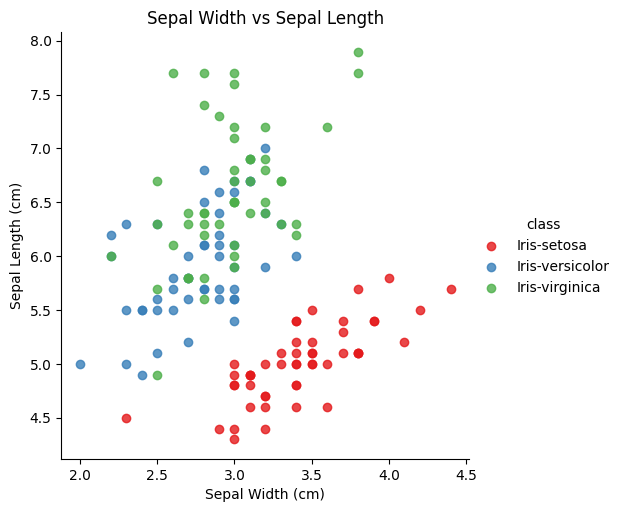

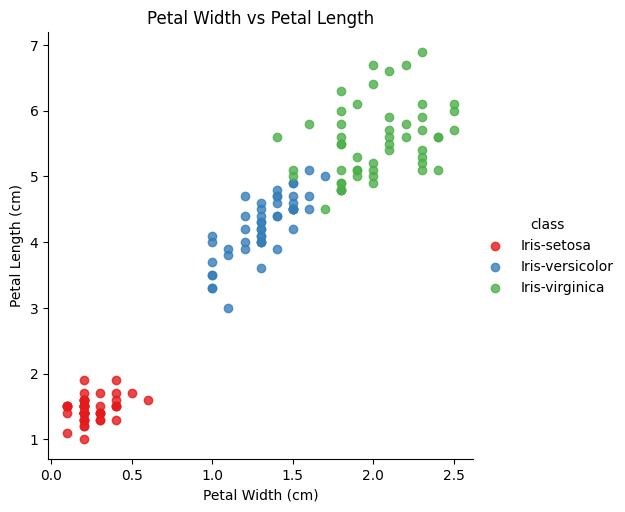

In [19]:
# Create scatter plot for sepal_width vs sepal_length
sns.lmplot(x='sepal_width', y='sepal_length', data=df, hue='class', fit_reg=False, palette='Set1')
plt.title('Sepal Width vs Sepal Length')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')

print()

# Create scatter plot for petal_width vs petal_length
sns.lmplot(x='petal_width', y='petal_length', data=df, hue='class', fit_reg=False, palette='Set1')
plt.title('Petal Width vs Petal Length')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')

plt.show()


In [20]:
# Seperate the features from the label
X = df.drop('class', axis=1)
Y = df['class']

# Convert class labels to numerical values
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Display the first few rows of X and Y
print("Feature variables (X):")
print(X.head())

print("\nResponse variable (Y):")
print(Y_encoded)

Feature variables (X):
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Response variable (Y):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=30)

In [22]:
# Define Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [23]:
# Define Manhattan distance function
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [24]:
# Define Cosine similarity function
def cosine_similarity(x1, x2):
    dot_product = np.dot(x1, x2)
    norm_x1 = np.linalg.norm(x1)
    norm_x2 = np.linalg.norm(x2)
    cosine = dot_product / (norm_x1 * norm_x2)
    return (1-cosine)

In [25]:
class KNNClassifier:
    def __init__(self, k=3, distance_measure='euclidean'):
        # Initialize KNNClassifier with default values for k and distance measure
        self.k = k
        self.distance_measure = distance_measure

    def fit(self, X_train, Y_train):
        # Store training data in instance variables
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        # Predict the class labels for the given test data
        predictions = []  # Initialize list to store predictions
        for i in range(len(X_test)):  # Iterate over each test sample
            distances = []  # Initialize list to store distances from test sample to training samples
            for j in range(len(self.X_train)):  # Iterate over each training sample
                # Calculate distance based on selected distance measure
                if self.distance_measure == 'euclidean':
                    dist = euclidean_distance(X_test[i], self.X_train[j])
                elif self.distance_measure == 'manhattan':
                    dist = manhattan_distance(X_test[i], self.X_train[j])
                elif self.distance_measure == 'cosine':
                    dist = cosine_similarity(X_test[i], self.X_train[j])
                # Store distance along with corresponding class label
                distances.append((dist, self.Y_train[j]))

            distances.sort(key=lambda x: x[0])  # Sort distances in ascending order
            neighbors = distances[:self.k]  # Select k nearest neighbors
            labels = [neighbor[1] for neighbor in neighbors]  # Extract class labels of neighbors
            # Predict the class label based on majority vote among the neighbors
            prediction = max(set(labels), key=labels.count)
            predictions.append(prediction)  # Append prediction to the list of predictions
        return predictions  # Return the list of predicted class labels


In [26]:
# Instantiate KNNClassifier with different distance measures
knn_euclidean = KNNClassifier(k=3, distance_measure='euclidean')
knn_manhattan = KNNClassifier(k=3, distance_measure='manhattan')
knn_cosine = KNNClassifier(k=3, distance_measure='cosine')

# Fit the model on the training data
knn_euclidean.fit(X_train.values, Y_train)
knn_manhattan.fit(X_train.values, Y_train)
knn_cosine.fit(X_train.values, Y_train)

# Predict on the test set
predictions_euclidean = knn_euclidean.predict(X_test.values)
predictions_manhattan = knn_manhattan.predict(X_test.values)
predictions_cosine = knn_cosine.predict(X_test.values)


In [27]:
# Calculate accuracy scores
accuracy_euclidean = accuracy_score(Y_test, predictions_euclidean)
accuracy_manhattan = accuracy_score(Y_test, predictions_manhattan)
accuracy_cosine = accuracy_score(Y_test, predictions_cosine)

print("Accuracy using Euclidean distance:", accuracy_euclidean)
print("Accuracy using Manhattan distance:", accuracy_manhattan)
print("Accuracy using Cosine similarity:", accuracy_cosine)


Accuracy using Euclidean distance: 0.9333333333333333
Accuracy using Manhattan distance: 0.9
Accuracy using Cosine similarity: 0.9666666666666667


In [28]:
# Count correct and incorrect predictions
def count_predictions(predictions, Y_test):
    correct = np.sum(predictions == Y_test)
    incorrect = len(Y_test) - correct
    return correct, incorrect

correct_euclidean, incorrect_euclidean = count_predictions(predictions_euclidean, Y_test)
correct_manhattan, incorrect_manhattan = count_predictions(predictions_manhattan, Y_test)
correct_cosine, incorrect_cosine = count_predictions(predictions_cosine, Y_test)

print("\nCorrect predictions (Euclidean):", correct_euclidean)
print("Incorrect predictions (Euclidean):", incorrect_euclidean)
print("\nCorrect predictions (Manhattan):", correct_manhattan)
print("Incorrect predictions (Manhattan):", incorrect_manhattan)
print("\nCorrect predictions (Cosine):", correct_cosine)
print("Incorrect predictions (Cosine):", incorrect_cosine)



Correct predictions (Euclidean): 28
Incorrect predictions (Euclidean): 2

Correct predictions (Manhattan): 27
Incorrect predictions (Manhattan): 3

Correct predictions (Cosine): 29
Incorrect predictions (Cosine): 1
